<font size="+5">#04 | Hyperparameter Tuning with Cross Validation</font>

- Subscribe to my [Blog ↗](https://blog.pythonassembly.com/)
- Let's keep in touch on [LinkedIn ↗](www.linkedin.com/in/jsulopz) 😄

# Discipline to Search Solutions in Google

> Apply the following steps when **looking for solutions in Google**:
>
> 1. **Necesity**: How to load an Excel in Python?
> 2. **Search in Google**: by keywords
>   - `load excel python`
>   - ~~how to load excel in python~~
> 3. **Solution**: What's the `function()` that loads an Excel in Python?
>   - A Function to Programming is what the Atom to Phisics.
>   - Every time you want to do something in programming
>   - **You will need a `function()`** to make it
>   - Theferore, you must **detect parenthesis `()`**
>   - Out of all the words that you see in a website
>   - Because they indicate the presence of a `function()`.

# Load the Data

> - The goal of this dataset is
> - To predict if **bank's customers** (rows) `default` next month
> - Based on their **socio-demographical characteristics** (columns)

In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls'
df = pd.read_excel(io=url, header=1, index_col=0)
df.sample(10)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,,,,
12335,120000,2,1,2,27,-1,-1,-1,-1,-1,-1,390,390,390,390,390,0,390,390,390,390,0,780,0
10420,30000,1,2,1,38,1,2,2,2,0,0,9303,9009,13861,13344,13972,18735,0,5000,0,1000,5000,0,0
26815,400000,1,1,3,31,1,-1,-1,-1,-1,-1,0,1731,499,1487,499,499,1731,499,1487,499,499,36983,0
5253,420000,2,1,2,29,-2,-2,-2,-2,-2,-2,4406,4595,-13,2666,1614,6066,4205,5000,2679,1622,6080,3594,0
14528,260000,1,1,1,38,-1,-1,2,2,-1,2,263,511,248,-15,3526,263,512,1,1,3805,1,527,0
28118,150000,2,2,2,43,0,0,0,0,0,0,111024,111486,12596,13610,14381,15147,2720,1500,1229,1000,1000,1000,0
12633,340000,2,2,2,27,-1,-1,-1,-1,-1,-1,14745,9318,4794,7819,332,16516,9318,5343,7819,332,16516,5000,0
14512,500000,1,1,2,30,-1,-1,-1,0,0,-1,1089,58665,168052,254571,59587,13398,58665,170119,156000,2000,13398,527143,0
11018,50000,2,1,2,23,-1,-1,-1,-1,0,-1,1050,1050,974,1224,1224,1025,1050,974,1300,1050,1025,1050,0


# `DecisionTreeClassifier()` with Default Hyperparameters

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
model = DecisionTreeClassifier()

In [15]:
y = df['default payment next month']

In [16]:
X = df.drop(columns='default payment next month') #X = df.iloc[:, :-1] 

In [17]:
y = df.iloc[:, -1]

In [18]:
X = df.iloc[:, :-1]

In [19]:
model.fit(X, y)

DecisionTreeClassifier()

In [21]:
y_pred = model.predict(X)

In [23]:
(y_pred == y).mean()

0.9993

In [24]:
model.score(X, y)

0.9993

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [27]:
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [28]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

## Accuracy

> In `train` data

In [29]:
model.score(X_train, y_train)

0.9995024875621891

> In `test` data

In [30]:
model.score(X_test, y_test)

0.7284848484848485

## Model Visualization

> - `plot_tree()`

In [31]:
from sklearn.tree import plot_tree

In [32]:
import matplotlib.pyplot as plt

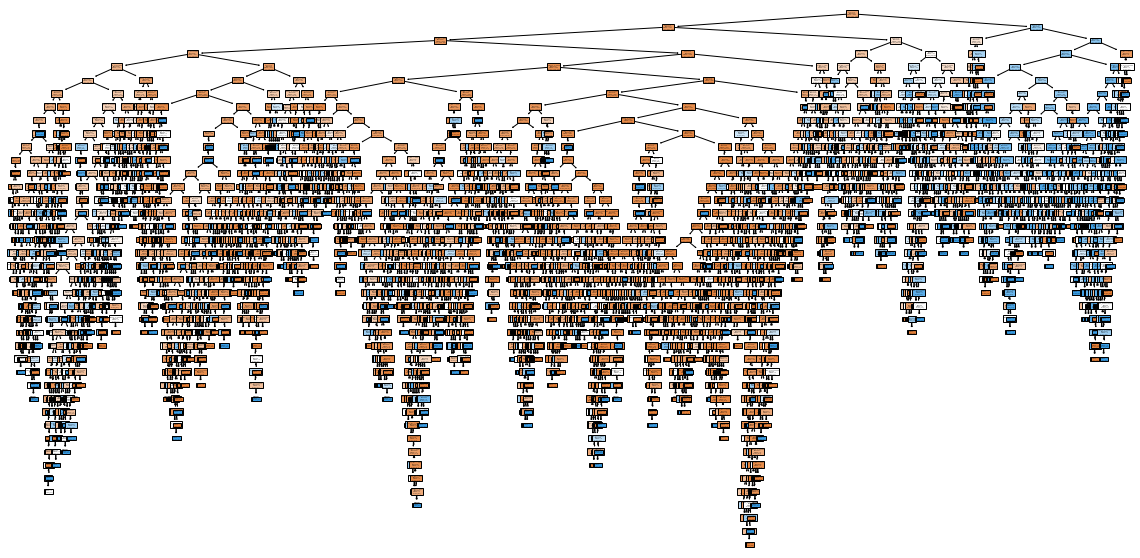

In [33]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `DecisionTreeClassifier()` with Custom Hyperparameters

In [34]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/7VeUPuFGJHk" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

> - The `model` has this hyperparameters ↓

In [37]:
model = DecisionTreeClassifier(max_depth=1)

In [39]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=1)

## 1st Configuration

### Accuracy

> In `train` data

In [40]:
model.score(X=X_train, y=y_train)

0.8186567164179105

> In `test` data

In [41]:
model.score(X=X_test, y=y_test)

0.8215151515151515

### Model Visualization

> - `plot_tree()`

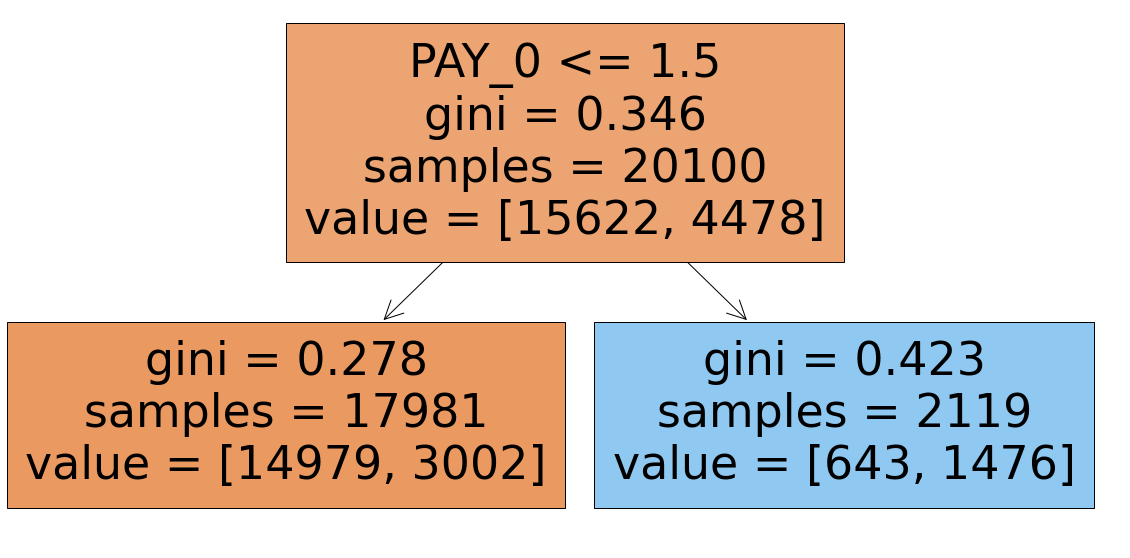

In [42]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 2nd Configuration

In [43]:
model = DecisionTreeClassifier(max_depth=20)

In [44]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20)

## 1st Configuration

### Accuracy

> In `train` data

In [45]:
model.score(X=X_train, y=y_train)

0.9533333333333334

> In `test` data

In [46]:
model.score(X=X_test, y=y_test)

0.7578787878787879

### Model Visualization

> - `plot_tree()`

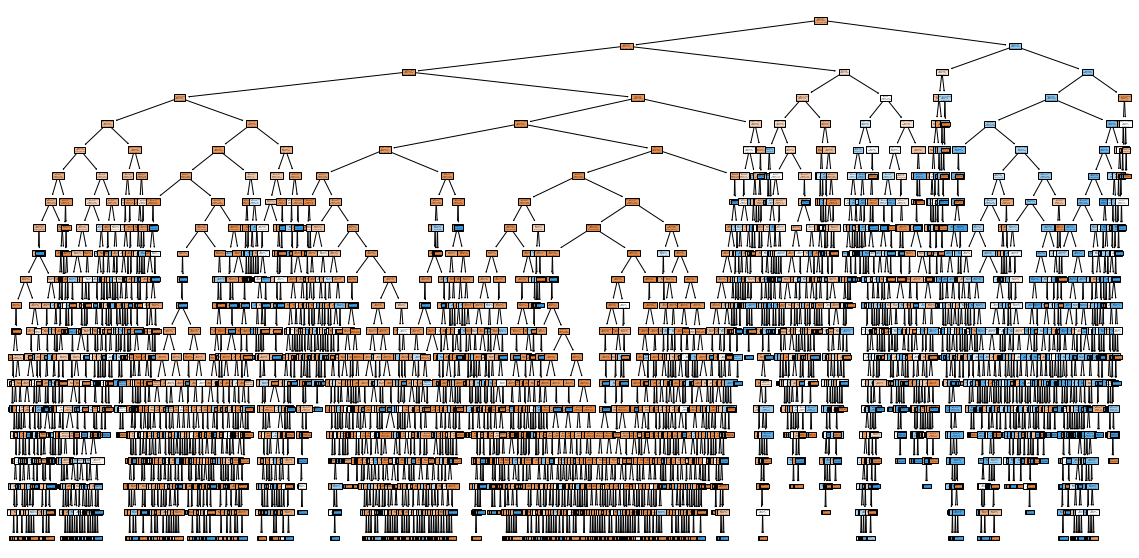

In [47]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 3rd Configuration

In [48]:
model = DecisionTreeClassifier(max_depth=15)

In [49]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

## 1st Configuration

### Accuracy

> In `train` data

In [50]:
model.score(X=X_train, y=y_train)

0.9080597014925373

> In `test` data

In [51]:
model.score(X=X_test, y=y_test)

0.7798989898989899

### Model Visualization

> - `plot_tree()`

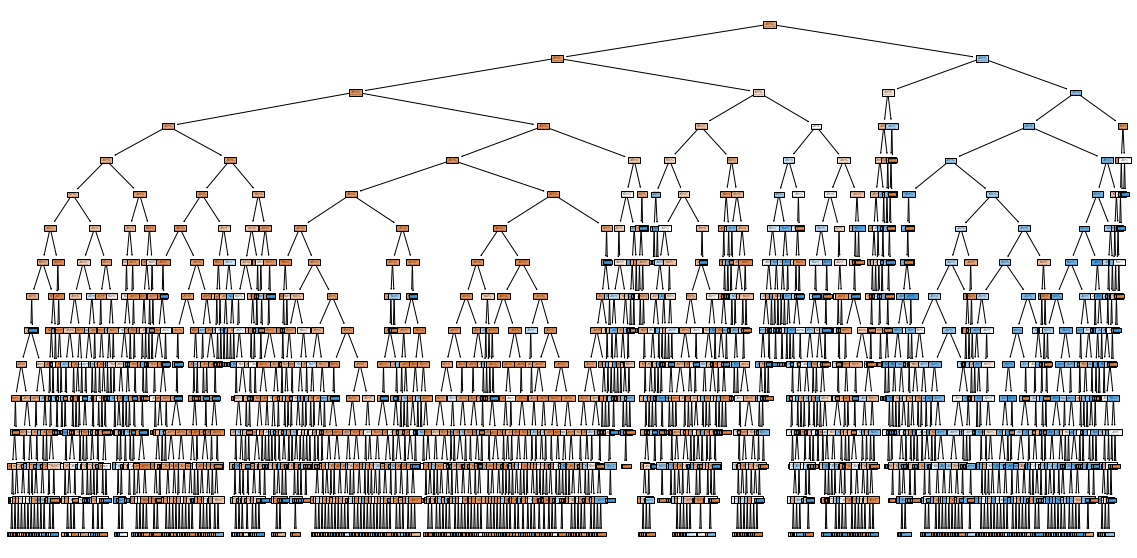

In [52]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 4th Configuration

In [53]:
model = DecisionTreeClassifier(max_depth=5)

In [54]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

## 1st Configuration

### Accuracy

> In `train` data

In [55]:
model.score(X=X_train, y=y_train)

0.8248756218905473

> In `test` data

In [56]:
model.score(X=X_test, y=y_test)

0.8189898989898989

### Model Visualization

> - `plot_tree()`

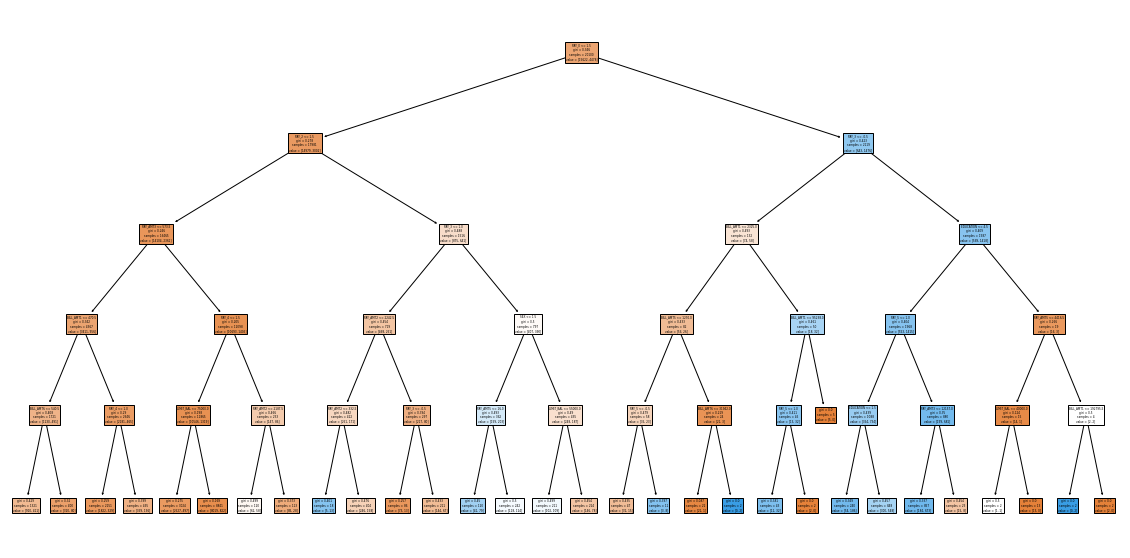

In [57]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

## 5th Configuration

In [58]:
model = DecisionTreeClassifier(min_samples_leaf=300)

In [59]:
model.fit(X_train, y_train)

DecisionTreeClassifier(min_samples_leaf=300)

## 1st Configuration

### Accuracy

> In `train` data

In [60]:
model.score(X=X_train, y=y_train)

0.8208457711442786

> In `test` data

In [61]:
model.score(X=X_test, y=y_test)

0.82

### Model Visualization

> - `plot_tree()`

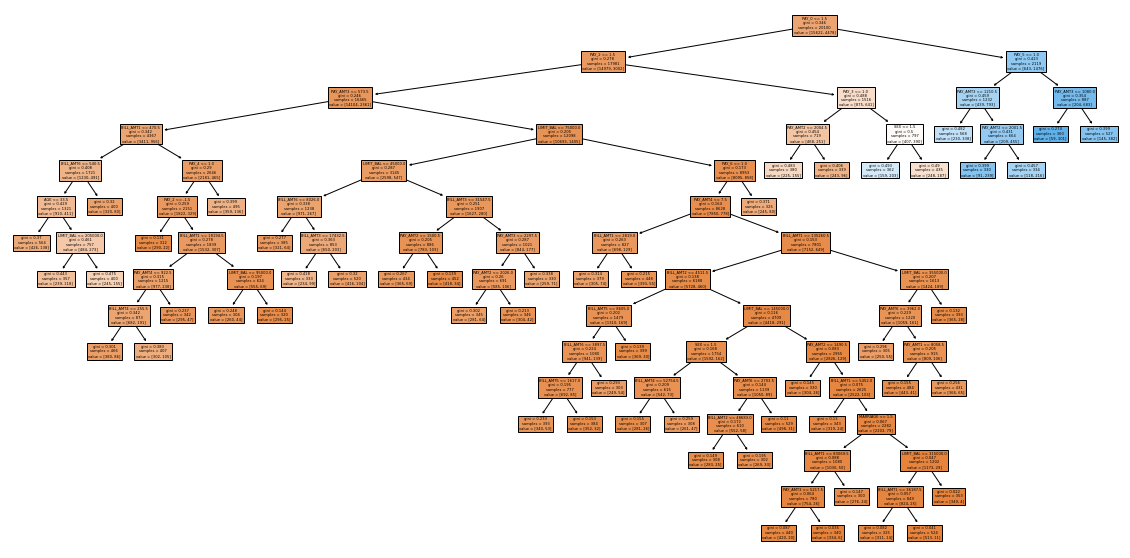

In [62]:
plt.figure(figsize=(20,10))
plot_tree(decision_tree=model, feature_names=X.columns, filled=True);

# `GridSearchCV()` to find Best Hyperparameters

> - How many scores for each fold?

<img src="src/grid_search_cross_validation.png" style="margin-top: 100px"/>

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
cv = GridSearchCV()

TypeError: __init__() missing 2 required positional arguments: 'estimator' and 'param_grid'

In [65]:
model = DecisionTreeClassifier()

In [66]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [68]:
params = {'max_depth': [5, 10, 15, 20]}

In [70]:
cv = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=2)

In [71]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END ........................................max_depth=5; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=10; total time=   0.1s
[CV] END .......................................max_depth=15; total time=   0.2s
[CV] END .......................................m

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20]}, verbose=2)

In [72]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5)

In [73]:
cv.best_params_

{'max_depth': 5}

In [74]:
model = DecisionTreeClassifier()

In [75]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [77]:
params = {'max_depth': [5, 10, 15, 20],
         'min_samples_leaf': [20, 40, 80, 160]}

In [78]:
cv = GridSearchCV(estimator=model, param_grid=params, cv=5, verbose=2)

In [79]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=20; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=40; total time=   0.1s
[CV] END ...................max_depth=5, min_samples_leaf=80; total time=   0.1s
[CV] END ...................max_depth=5, min_sam

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': [20, 40, 80, 160]},
             verbose=2)

In [80]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=5, min_samples_leaf=80)

In [81]:
cv.best_params_

{'max_depth': 5, 'min_samples_leaf': 80}

In [82]:
cv.score(X_test, y_test)

0.8175757575757576

# Other Models

## Support Vector Machines `SVC()`

In [83]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/efR1C6CvhmE" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [84]:
from sklearn.svm import SVC

In [85]:
model = SVC()

In [86]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [87]:
params = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']}

In [88]:
cv = GridSearchCV(estimator=model, param_grid=params)

In [ ]:
cv.fit(X_train, y_train)

## `KNeighborsClassifier()`

In [3]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/HVXime0nQeI" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

# Best Model with Best Hyperparameters